# ANÁLSIS DE DISCURSO DE CANDIDATOS A LA PRESIDENCIA DE COLOMBIA
## Técnica Análisis de sentimientos

# Librerias

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tweepy
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

In [4]:
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
AK = 'vS4oxRBGzr9ntxvAHBaHixeZO' #API_Key

AKS = 'YoMXdRTcPKjkRDVyRTC98Pqk1tGmwMYEbLlaaNc69HlylC0nXA' #API_Key_Secret

#Bearer_Token
BT = 'AAAAAAAAAAAAAAAAAAAAAL9DcQEAAAAAB4CguoAnqFHIO%2BN9GMXs98eY060%3DjxULVQTw1spgN9vaDj0Wj4PbpfT6NaEA30yJezenApwNmnsNxn'

AT = '1260182604-NAPUUvlONFc4KhpRkDLebb6DMlEcMc4qoCdI2QF' #Access_Token

ATS = 'CBIf22jBx6E7azRLj3MEJ1adsB7jd6NC0RobOuTd0NiFU' #Access_Token_Secret

In [8]:
auth = tweepy.OAuthHandler(AK, AKS)
auth.set_access_token(AT, ATS)

In [9]:
api = tweepy.API(auth, wait_on_rate_limit = True)

### Prueba

In [382]:
for tweet in tweepy.Cursor(api.user_timeline, screen_name = 'xdiegoramirezx', tweet_mode = 'extended').items(2):
    print(json.dumps(tweet._json, indent = 2))

{
  "created_at": "Sat May 07 21:37:08 +0000 2022",
  "id": 1523054350956113921,
  "id_str": "1523054350956113921",
  "full_text": "RT @DePacotilla: @xdiegoramirezx https://t.co/is0FeEuppQ",
  "truncated": false,
  "display_text_range": [
    0,
    56
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "DePacotilla",
        "name": "Alvaro Forero Navas",
        "id": 264802537,
        "id_str": "264802537",
        "indices": [
          3,
          15
        ]
      },
      {
        "screen_name": "xdiegoramirezx",
        "name": "Diego A Ram\u00edrez Hdez",
        "id": 1260182604,
        "id_str": "1260182604",
        "indices": [
          17,
          32
        ]
      }
    ],
    "urls": [
      {
        "url": "https://t.co/is0FeEuppQ",
        "expanded_url": "https://twitter.com/DePacotilla/status/1522914631769108480",
        "display_url": "twitter.com/DePacotilla/st\u2026",
        "indices": [
  

# Función Web Scraping cuentas de twitter de los candidatos.

In [12]:
def data(candi, items=1):
 
    df = pd.DataFrame(columns = ['candidato', 'fecha', 'tuit', 'likes', 'rt'])

    fecha = []
    texto = []
    likes = []
    rts = []
    candidato = []
    
    for tweet in tweepy.Cursor(api.user_timeline, screen_name = candi, tweet_mode = 'extended').items(items):
        candidato.append(candi)
        fecha.append(tweet._json['created_at']) 
        texto.append(tweet._json['full_text'])
        likes.append(tweet._json['favorite_count'])
        rts.append(tweet._json['retweet_count'])
 
    df['candidato'] = candidato
    df['fecha'] = fecha
    df['tuit'] = texto
    df['likes'] = likes
    df['rt'] = rts
    df['fecha'] = pd.to_datetime(df['fecha'], infer_datetime_format=True)
    df['fecha_ano'] = df['fecha'].dt.year.astype('string')
    df['fecha_mes'] = df['fecha'].dt.month_name()
    df['fecha_dia'] = df['fecha'].dt.day.astype('string')
    df['mes_dia'] = df['fecha_dia'].str.cat(df['fecha_mes'],sep="/")
    df['mes_ano'] = df['fecha_mes'].str.cat(df['fecha_ano'],sep="/")
    df['d_m_a'] = df['mes_dia'].str.cat(df['fecha_ano'],sep="/")
    
    return(df)
    

# Función para excluir del texto caracteres especiales

In [18]:
from unicodedata import normalize
import re
def formatingText(text):
    text = text.lower()
    text = re.sub('<.*?>', ' ', text)
    text = re.sub(':.*?:', ' ', text)
    text = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", text), 0, re.I)
    text = normalize( 'NFC', text)
    text = re.sub('[^a-z ]', ' ', text)
    return text

In [16]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)

    return text

# CANDIDATOS

# Gustavo Petro

In [13]:
GP = data('petrogustavo', 1000)
GP.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 00:45:26+00:00   
1  petrogustavo 2022-05-09 00:44:50+00:00   
2  petrogustavo 2022-05-08 23:35:57+00:00   
3  petrogustavo 2022-05-08 23:08:30+00:00   
4  petrogustavo 2022-05-08 20:53:58+00:00   

                                                tuit  likes    rt fecha_ano  \
0  RT @petrogustavo: Un camino por la vida https:...      0  1662      2022   
1  RT @PatriciaUribe07: Esta noche en  @NoticiasU...      0   356      2022   
2      Un camino por la vida https://t.co/3iWYRbzUVH   4354  1662      2022   
3  RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la ...      0   369      2022   
4  Duque le entregó el territorio al Clan del Gol...   6015  2232      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         8   8/May  8/May/2022  
3       May         8   8/May  8/May/2022  
4       May         8   8/May  8/May/2022

In [14]:
data_GP = ' '.join(item for item in GP.tuit)
data_GP

'RT @petrogustavo: Un camino por la vida https://t.co/3iWYRbzUVH RT @PatriciaUribe07: Esta noche en  @NoticiasUno  Obispo de Quibdó urge diálogo con grupos criminales para evitar mas derramamiento de sang… Un camino por la vida https://t.co/3iWYRbzUVH RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la gran Petro Caravana, con alegría y sabrosura recorrimos las calles de Cali, llevando el mensa… Duque le entregó el territorio al Clan del Golfo. Nos corresponde a nosotros recuperarlo y lo haremos pacíficamente, a través de la Seguridad Humana. https://t.co/NVITYkz4rE RT @lasillavacia: Esta semana publicamos esta crónica en la que acompañamos por un día al candidato  @petrogustavo a hacer campaña. El perf… RT @sofiapetroa: Gracias por todas esas respuestas!! Aquí les dejo un vídeo respondiendo algunas de ellas.💜\n\n⬇️⬇️\nhttps://t.co/xBPsoG8YT7 h… RT @PactoCol: “Sabemos que el rol de la maternidad en la mayoría de los casos la ejercemos en soledad. Trabajaremos para que esta responsab… Desde e

In [19]:
words = word_tokenize(clean_text(data_GP)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['camino', 'vida', 'noche', 'obispo', 'quibdó', 'urge', 'diálogo', 'grupos', 'criminales', 'evitar', 'mas', 'derramamiento', 'camino', 'vida', 'caravana', 'así', 'vivimos', 'gran', 'petro', 'caravana', 'alegría', 'sabrosura', 'recorrimos', 'calles', 'cali', 'llevando', 'duque', 'entregó', 'territorio', 'clan', 'golfo', 'corresponde', 'recuperarlo', 'haremos', 'pacíficamente', 'través', 'seguridad', 'humana', 'semana', 'publicamos', 'crónica', 'acompañamos', 'día', 'candidato', 'hacer', 'campaña', 'gracias', 'todas', 'respuestas', 'aquí', 'dejo', 'vídeo', 'respondiendo', 'sabemos', 'rol', 'maternidad', 'mayoría', 'casos', 'ejercemos', 'soledad', 'trabajaremos', 'primer', 'dia', 'gobierno', 'reconocerán', 'protocolos', 'gobierno', 'santos', 'firmó', 'garantes', 'paz', 'iniciaremos', 'proceso', 'paz', 'integral', 'actores', 'violencia', 'propondremos', 'gran', 'pacto', 'sociedad', 'convivencia', 'continuismo', 'puede', 'hacer', 'campaña', 'sino', 'miedo', 'mentira', 'vieron', 'cómo', 'pue

In [20]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

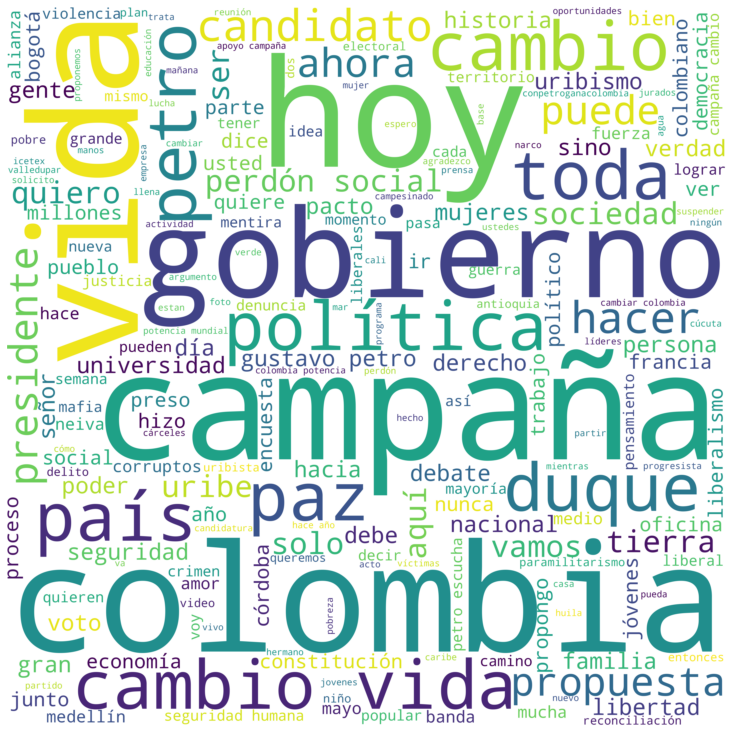

In [21]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Fico Gutierrez

In [22]:
FG = data('FicoGutierrez', 1000)
FG.head(5)

candidato                     fecha  \
0  FicoGutierrez 2022-05-09 02:48:13+00:00   
1  FicoGutierrez 2022-05-09 02:30:14+00:00   
2  FicoGutierrez 2022-05-09 02:17:56+00:00   
3  FicoGutierrez 2022-05-09 02:07:52+00:00   
4  FicoGutierrez 2022-05-09 01:57:56+00:00   

                                                tuit  likes   rt fecha_ano  \
0  Yo no me creo un salvador, no sufro de superio...   2908  849      2022   
1  Sin campo, no hay ciudad. Mi propuesta: pasar ...   1146  372      2022   
2  Es importante controlar las zonas de preservac...    714  216      2022   
3  Tenemos 59 parques naturales, 17 millones de h...   1210  298      2022   
4  La ganadería legal hay que apoyarla y acompaña...    976  293      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         9   9/May  9/May/2022  
3       May         9   9/May  9/May/2022  
4       May         9   9/May  9/May/2022

In [23]:
data_FG = ' '.join(item for item in FG.tuit)
data_FG

'Yo no me creo un salvador, no sufro de superioridad moral, gente buena hay en todos los sectores. Yo voy a tomar lo bueno de todas las personas. Es necesario un fortalecimiento institucional. #PorElFuturoFico Sin campo, no hay ciudad. Mi propuesta: pasar de 1 billón de pesos de inversión anual en vías terciarias a 3 billones anuales, distritos de riego, créditos blandos, no más intermediación para comercializar, insumos agrícolas, seguridad física y jurídica. #PorElFuturoFico Es importante controlar las zonas de preservación y fortalecer los parques naturales. Vamos a invertir en talento humano y a llegar con autoridad para prevenir la deforestación de nuestros bosques. #PorElFuturoFico Tenemos 59 parques naturales, 17 millones de hectáreas de bosque en todo el país. Vamos a llegar con toda la fuerza del Estado para proteger nuestras reservas naturales. #PorElFuturoFico La ganadería legal hay que apoyarla y acompañarla. Pero otra cosa es la deforestación para trabajar esta actividad. 

In [24]:
words = word_tokenize(clean_text(data_FG)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['creo', 'salvador', 'sufro', 'superioridad', 'moral', 'gente', 'buena', 'sectores', 'voy', 'tomar', 'bueno', 'todas', 'personas', 'necesario', 'fortalecimiento', 'institucional', 'porelfuturofico', 'campo', 'ciudad', 'propuesta', 'pasar', 'billón', 'pesos', 'inversión', 'anual', 'vías', 'terciarias', 'billones', 'anuales', 'distritos', 'riego', 'créditos', 'blandos', 'intermediación', 'comercializar', 'insumos', 'agrícolas', 'seguridad', 'física', 'jurídica', 'porelfuturofico', 'importante', 'controlar', 'zonas', 'preservación', 'fortalecer', 'parques', 'naturales', 'vamos', 'invertir', 'talento', 'humano', 'llegar', 'autoridad', 'prevenir', 'deforestación', 'bosques', 'porelfuturofico', 'parques', 'naturales', 'millones', 'hectáreas', 'bosque', 'país', 'vamos', 'llegar', 'toda', 'fuerza', 'proteger', 'reservas', 'naturales', 'porelfuturofico', 'ganadería', 'legal', 'apoyarla', 'acompañarla', 'cosa', 'deforestación', 'trabajar', 'actividad', 'vamos', 'combatir', 'corrupción', 'asociad

In [27]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si', 'forolr']
words = [w for w in words if not w in no_words and w.isalpha()]

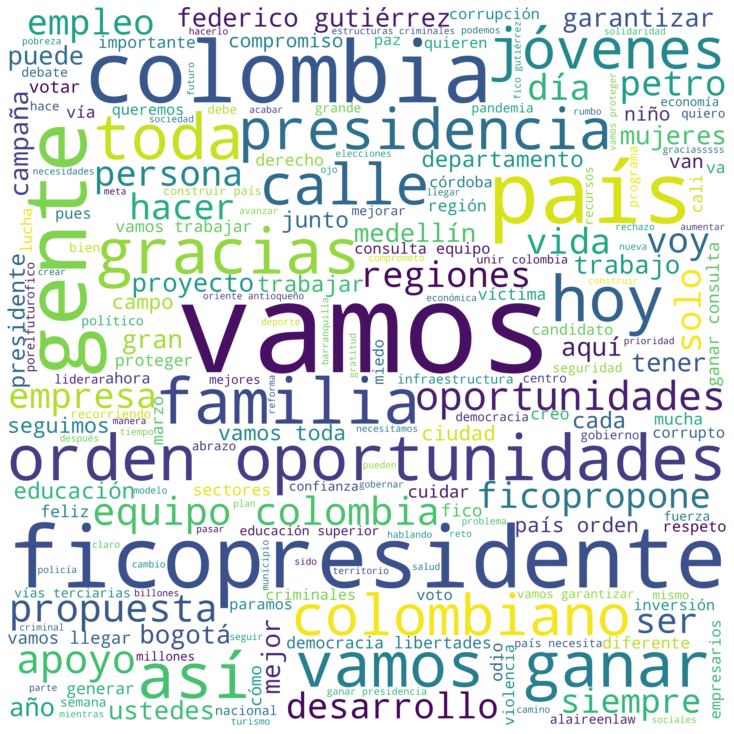

In [28]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Rodolfo Hernández

In [29]:
RH = data('ingrodolfohdez', 1000)
RH.head(5)

candidato                     fecha  \
0  ingrodolfohdez 2022-05-09 02:21:27+00:00   
1  ingrodolfohdez 2022-05-09 02:04:01+00:00   
2  ingrodolfohdez 2022-05-09 02:03:15+00:00   
3  ingrodolfohdez 2022-05-09 02:01:50+00:00   
4  ingrodolfohdez 2022-05-09 01:46:08+00:00   

                                                tuit  likes  rt fecha_ano  \
0  El campo para mi será el motor de Colombia. Co...     64  13      2022   
1  No hacer contrataciones con encorbatados que n...     57  11      2022   
2  Hay que ponerle dueño a la reforestación y est...     35   5      2022   
3  Se trata de atender técnica y financieramente ...     25   6      2022   
4  No estoy de acuerdo con más normas. Es mirar c...     53  11      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         9   9/May  9/May/2022  
3       May         9   9/May  9/May/2022  
4       May         9   9/May  9/May/2022

In [30]:
data_RH = ' '.join(item for item in RH.tuit)
data_RH

'El campo para mi será el motor de Colombia. Conmigo van a tener un apoyo general, porque no es posible sacar a los campesinos del campo para traerlos a la ciudad a aguantar hambre🌿🌱\nGracias a @noticiascaracol por la invitación. No hacer contrataciones con encorbatados que no van, sino el día que les van a pagar el acta, les pagan una miserableza y se traen el resto de la plata para Bogotá #EnVivo 🔴 en el #DebateAmbiental 🌱 @noticiascaracol #RodolfoPresidente Hay que ponerle dueño a la reforestación y estabilizarla con el cuidado de ustedes que son los que viven allá, los que han sufrido todo el impacto son los que tienen que recibir el beneficio económico.#EnVivo 🔴 en el #DebateAmbiental 🌱 @noticiascaracol #RodolfoPresidente Se trata de atender técnica y financieramente a las comunidades para que se encarguen de la reforestación con los árboles nativos, pero pagándoles por cada árbol que siembren.. #EnVivo 🔴 en el #DebateAmbiental 🌱 @noticiascaracol #RodolfoPresidente No estoy de acu

In [31]:
words = word_tokenize(clean_text(data_RH)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['campo', 'motor', 'colombia', 'conmigo', 'van', 'tener', 'apoyo', 'general', 'posible', 'sacar', 'campesinos', 'campo', 'traerlos', 'ciudad', 'aguantar', 'gracias', 'invitación', 'hacer', 'contrataciones', 'encorbatados', 'van', 'sino', 'día', 'van', 'pagar', 'acta', 'pagan', 'miserableza', 'traen', 'resto', 'plata', 'bogotá', 'envivo', 'debateambiental', 'rodolfopresidente', 'ponerle', 'dueño', 'reforestación', 'estabilizarla', 'cuidado', 'ustedes', 'viven', 'allá', 'sufrido', 'impacto', 'recibir', 'beneficio', 'debateambiental', 'rodolfopresidente', 'trata', 'atender', 'técnica', 'financieramente', 'comunidades', 'encarguen', 'reforestación', 'árboles', 'nativos', 'pagándoles', 'cada', 'árbol', 'siembren', 'envivo', 'debateambiental', 'rodolfopresidente', 'acuerdo', 'normas', 'mirar', 'cuáles', 'sirven', 'poner', 'colombianos', 'buenos', 'sepan', 'comprometidos', 'defender', 'patrimonio', 'ambiental', 'biodiversidad', 'planeta', 'aquí', 'colombia', 'envivo', 'debateambiental', 'aquí

In [32]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

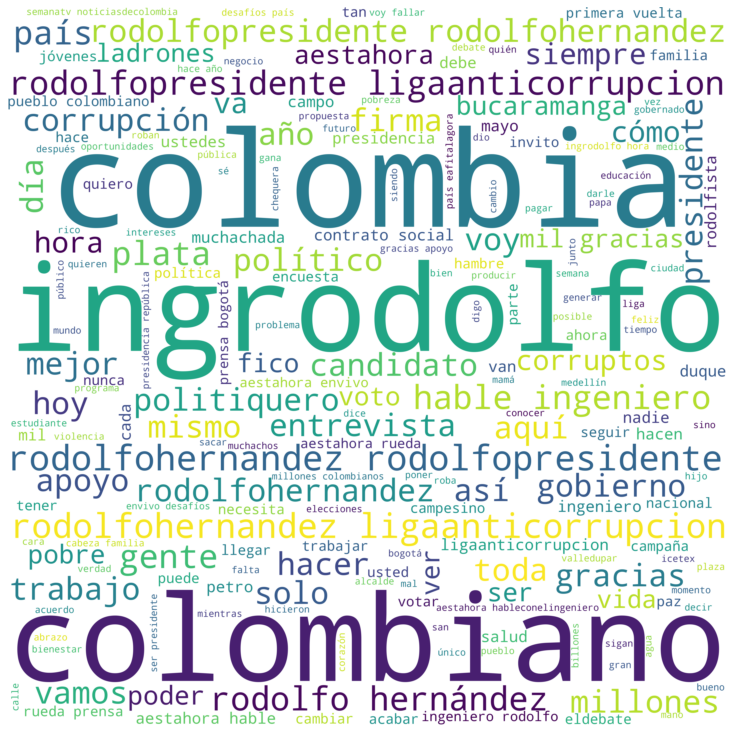

In [33]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Sergio Fajardo

In [34]:
SF = data('sergio_fajardo', 1000)
SF.head(5)

candidato                     fecha  \
0  sergio_fajardo 2022-05-09 03:17:14+00:00   
1  sergio_fajardo 2022-05-09 03:05:40+00:00   
2  sergio_fajardo 2022-05-09 03:01:50+00:00   
3  sergio_fajardo 2022-05-09 02:14:56+00:00   
4  sergio_fajardo 2022-05-09 02:01:40+00:00   

                                                tuit  likes  rt fecha_ano  \
0  COHERENCIA + CONSISTENCIA = CONFIANZA. Lo que ...    320  87      2022   
1  @mcarvajal28 Gracias Marcela por conocer nuest...     52   7      2022   
2  RT @mcarvajal28: @sergio_fajardo es el que más...      0  64      2022   
3  RT @jccardenas1965: Del debate ambiental de @N...      0  37      2022   
4  A la biodiversidad la vamos a conocer, conserv...    249  62      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         9   9/May  9/May/2022  
3       May         9   9/May  9/May/2022  
4       May         9   9/May  9/May/2022

In [35]:
data_SF = ' '.join(item for item in SF.tuit)
data_SF

'COHERENCIA + CONSISTENCIA = CONFIANZA. Lo que necesita Colombia. https://t.co/VZgVRdYyiW @mcarvajal28 Gracias Marcela por conocer nuestras propuestas y compartirlas. Un abrazo, seguimos en este camino. RT @mcarvajal28: @sergio_fajardo es el que más clara tiene las propuestas ambientales, sin duda RT @jccardenas1965: Del debate ambiental de @NoticiasCaracol queda clarísimo que la propuesta de @sergio_fajardo es mucho mejor que la de F… A la biodiversidad la vamos a conocer, conservar y aprovechar sosteniblemente. En nuestro nuevo modelo los bosques serán fuente de oportunidades para todas las personas. #DebateAmbiental .@LuisGMurillo, @JuliaMirandaLo, Juan Mayr, Ernesto Guhl, @Brigittelgb son parte del equipo que me acompaña y que me apoya en esta lucha ambiental. Colombia cambiará. #DebateAmbiental RT @LuisGMurillo: El papel de las comunidades formalizadas es fundamental para frenar la tala indiscriminada de bosques. Pero hay que enten… RT @FcdsOrg: ¿Cómo detener la deforestación en C

In [36]:
words = word_tokenize(clean_text(data_SF)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['coherencia', 'consistencia', 'confianza', 'necesita', 'colombia', 'gracias', 'marcela', 'conocer', 'propuestas', 'compartirlas', 'abrazo', 'seguimos', 'camino', 'clara', 'propuestas', 'ambientales', 'duda', 'debate', 'ambiental', 'queda', 'clarísimo', 'propuesta', 'mejor', 'biodiversidad', 'vamos', 'conocer', 'conservar', 'aprovechar', 'sosteniblemente', 'nuevo', 'modelo', 'bosques', 'fuente', 'oportunidades', 'todas', 'personas', 'debateambiental', 'juan', 'mayr', 'ernesto', 'guhl', 'parte', 'equipo', 'acompaña', 'apoya', 'lucha', 'ambiental', 'colombia', 'cambiará', 'debateambiental', 'papel', 'comunidades', 'formalizadas', 'fundamental', 'frenar', 'tala', 'indiscriminada', 'bosques', 'detener', 'deforestación', 'colombia', 'responde', 'debate', 'quedará', 'fijado', 'todas', 'plataformas', 'agosto', 'empieza', 'gran', 'proyecto', 'educación', 'ambiental', 'colombia', 'reto', 'tener', 'millones', 'guardianes', 'parques', 'país', 'debateambiental', 'gobernador', 'antioquia', 'adquiri

In [37]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

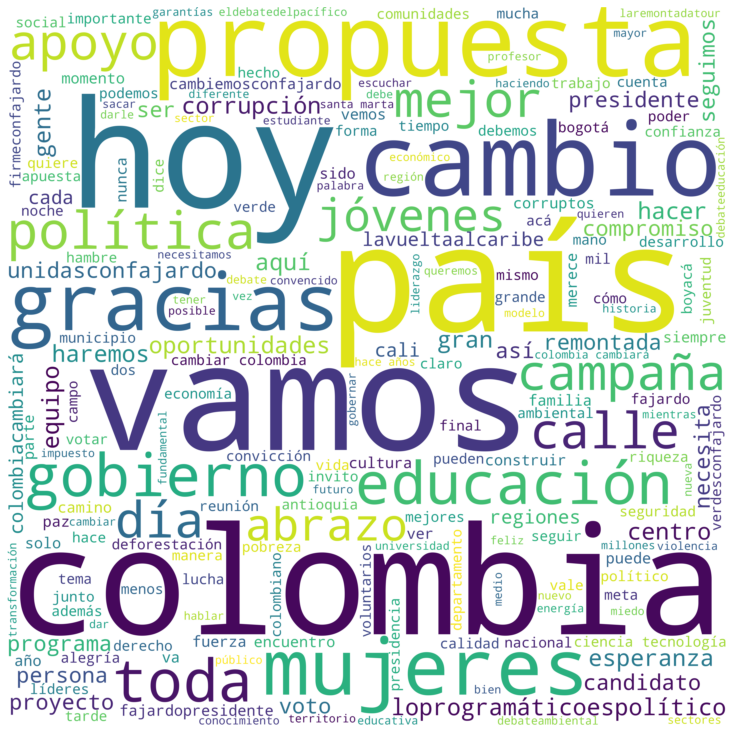

In [38]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Ingrid Betancourt

In [39]:
IB = data('IBetancourtCol', 1000)
IB.head(5)

candidato                     fecha  \
0  IBetancourtCol 2022-05-09 03:07:14+00:00   
1  IBetancourtCol 2022-05-07 22:18:45+00:00   
2  IBetancourtCol 2022-05-06 11:27:56+00:00   
3  IBetancourtCol 2022-05-06 01:55:58+00:00   
4  IBetancourtCol 2022-05-05 22:02:28+00:00   

                                                tuit  likes  rt fecha_ano  \
0  RT @AlvaroGarciaJ: A las 7:30 p.m. estaremos #...      0   3      2022   
1  RT @RTVCco: ¡#ColombiaMiElección y la de todos...      0   7      2022   
2  La eliminación de la ley de garantías fue una ...     63  16      2022   
3  Estamos frente a maniobras con apariencia de l...     38  15      2022   
4  En debate con @urosario\n\nNuestra prioridad f...     34   5      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         7   7/May  7/May/2022  
2       May         6   6/May  6/May/2022  
3       May         6   6/May  6/May/2022  
4       May         5   5/May  5/May/2022

In [40]:
data_IB = ' '.join(item for item in IB.tuit)
data_IB

'RT @AlvaroGarciaJ: A las 7:30 p.m. estaremos #ConectadosCon los candidatos presidenciales para conocer sus planes de gobierno y propuestas.… RT @RTVCco: ¡#ColombiaMiElección y la de todos!🇨🇴\nPor eso, seguimos #ConectadosCon los candidatos presidenciales.🗳️ Este domingo @AlvaroGar… La eliminación de la ley de garantías fue una alcantarilla por la que se robaron otra vez billones de pesos que debían atender salud, educación y alimentación de millones de niñas y niños colombianos. Como siempre, hubo garantías, pero a favor de los corruptos.\n#LeyDeGarantias Estamos frente a maniobras con apariencia de legalidad, impidiendo que nuestro proyecto político entre a jugar en igualdad de condiciones en esta campaña. No han llegado los recursos para recorrer todo el país, pautar y colocar vallas @CNE_COLOMBIA @MinHacienda @jrestrp https://t.co/ESZAoP79DV En debate con @urosario\n\nNuestra prioridad frente a la Guajira es la de enfrentar a los corruptos que día a día impiden que la comunidad ten

In [41]:
words = word_tokenize(clean_text(data_IB)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['conectadoscon', 'candidatos', 'presidenciales', 'conocer', 'planes', 'gobierno', 'seguimos', 'conectadoscon', 'candidatos', 'domingo', 'eliminación', 'ley', 'garantías', 'alcantarilla', 'robaron', 'vez', 'billones', 'pesos', 'debían', 'atender', 'salud', 'educación', 'alimentación', 'millones', 'niñas', 'niños', 'colombianos', 'siempre', 'garantías', 'favor', 'corruptos', 'leydegarantias', 'frente', 'maniobras', 'apariencia', 'legalidad', 'impidiendo', 'proyecto', 'político', 'jugar', 'igualdad', 'condiciones', 'campaña', 'llegado', 'recursos', 'recorrer', 'país', 'pautar', 'colocar', 'vallas', 'debate', 'prioridad', 'frente', 'guajira', 'enfrentar', 'corruptos', 'día', 'día', 'impiden', 'comunidad', 'acceso', 'real', 'derechos', 'corrupción', 'ingridpresidenta', 'urvota', 'jaquealacorrupción', 'debate', 'amentar', 'acceso', 'oportunidades', 'jóvenes', 'zonas', 'apartadas', 'barato', 'parte', 'permitirá', 'aumentar', 'competitividad', 'jóvenes', 'inserten', 'retos', 'tercer', 'mileni

In [42]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

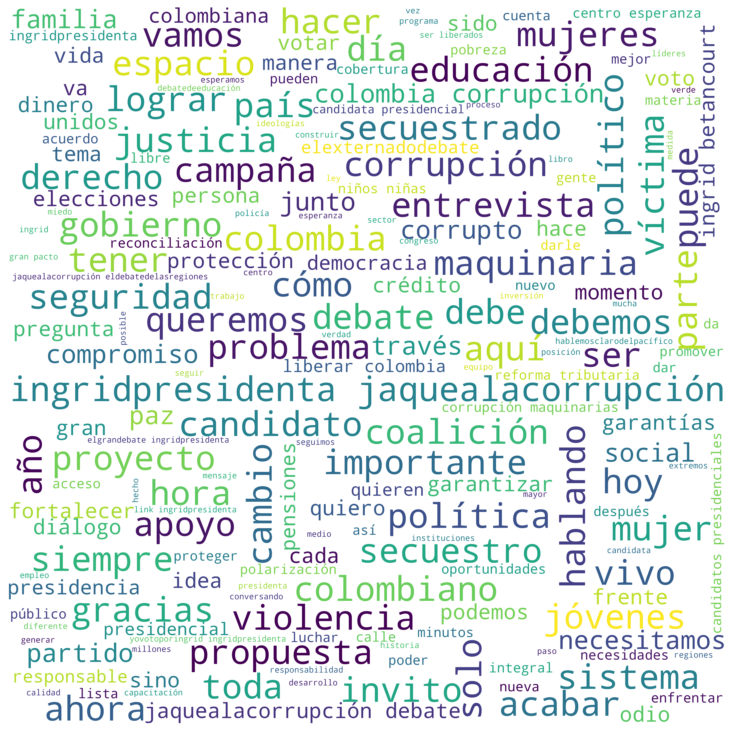

In [43]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Enrique Gómez

In [44]:
EG = data('Enrique_GomezM', 1000)
EG.head(5)

candidato                     fecha  \
0  Enrique_GomezM 2022-05-08 19:52:00+00:00   
1  Enrique_GomezM 2022-05-08 16:35:43+00:00   
2  Enrique_GomezM 2022-05-08 15:47:24+00:00   
3  Enrique_GomezM 2022-05-08 12:23:08+00:00   
4  Enrique_GomezM 2022-05-07 20:27:06+00:00   

                                                tuit  likes    rt fecha_ano  \
0                                 @SectorPrdctvo 103      0     0      2022   
1  Hoy celebramos el #DíaDeLaMadre y también conm...    453   157      2022   
2  RT @MovSalvacionNal: El socialismo miente, dis...      0  3186      2022   
3  Si hemos sido y hemos podido es por ustedes. S...    182    55      2022   
4                                 @PaulinaSofiaTO ☺️      3     0      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         8   8/May  8/May/2022  
1       May         8   8/May  8/May/2022  
2       May         8   8/May  8/May/2022  
3       May         8   8/May  8/May/2022  
4       May         7   7/May  7/May/2022

In [45]:
data_EG = ' '.join(item for item in EG.tuit)
data_EG

'@SectorPrdctvo 103 Hoy celebramos el #DíaDeLaMadre y también conmemoramos el natalicio de Álvaro Gómez Hurtado, fundador de Salvación Nacional: Una respuesta a la pésima política en Colombia. Decidimos continuar con su legado y estamos haciendo un trabajo limpio al margen del establecimiento. https://t.co/MrNOyB6oix RT @MovSalvacionNal: El socialismo miente, distorsiona y exagera los problemas normales de una sociedad. @IglesiasJulio87 se toma el trabaj… Si hemos sido y hemos podido es por ustedes. Sin la fuerza materna, femenina, poderosa que nos guía no habrían posibilidades de para nosotros como nación. Feliz día a todas las mamás porque nos hacen felices todos los días. ¡Gracias! https://t.co/LCsZXw2T7R @PaulinaSofiaTO ☺️ RT @MovSalvacionNal: Nosotros somos los verdaderos pioneros de la defensa de nuestra ecología. https://t.co/WY0bqafxlB @PaulinaSofiaTO Hola Paulina! Que bien, estamos alineados! Un abrazo RT @PaulinaSofiaTO: @Enrique_GomezM , hola! 😍 RT @MovSalvacionNal: Segurame

In [46]:
words = word_tokenize(clean_text(data_EG)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['hoy', 'celebramos', 'díadelamadre', 'conmemoramos', 'natalicio', 'álvaro', 'gómez', 'hurtado', 'fundador', 'salvación', 'nacional', 'respuesta', 'pésima', 'política', 'colombia', 'decidimos', 'continuar', 'legado', 'haciendo', 'trabajo', 'limpio', 'margen', 'establecimiento', 'socialismo', 'miente', 'distorsiona', 'exagera', 'problemas', 'normales', 'sociedad', 'toma', 'si', 'sido', 'podido', 'ustedes', 'fuerza', 'materna', 'femenina', 'poderosa', 'guía', 'posibilidades', 'nación', 'feliz', 'día', 'todas', 'mamás', 'hacen', 'felices', 'días', 'verdaderos', 'pioneros', 'defensa', 'ecología', 'hola', 'paulina', 'bien', 'alineados', 'abrazo', 'hola', 'seguramente', 'igual', 'falso', 'libro', 'sostiene', 'participó', 'constituyente', 'gracias', 'hacer', 'trabajo', 'pedagógico', 'necesario', 'revisando', 'condiciones', 'mueven', 'alimentos', 'corabastos', 'jornada', 'mayor', 'actividad', 'queda', 'claro', 'necesitan', 'medidas', 'carácter', 'urgente', 'evitar', 'inflación', 'desborde', 's

In [47]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

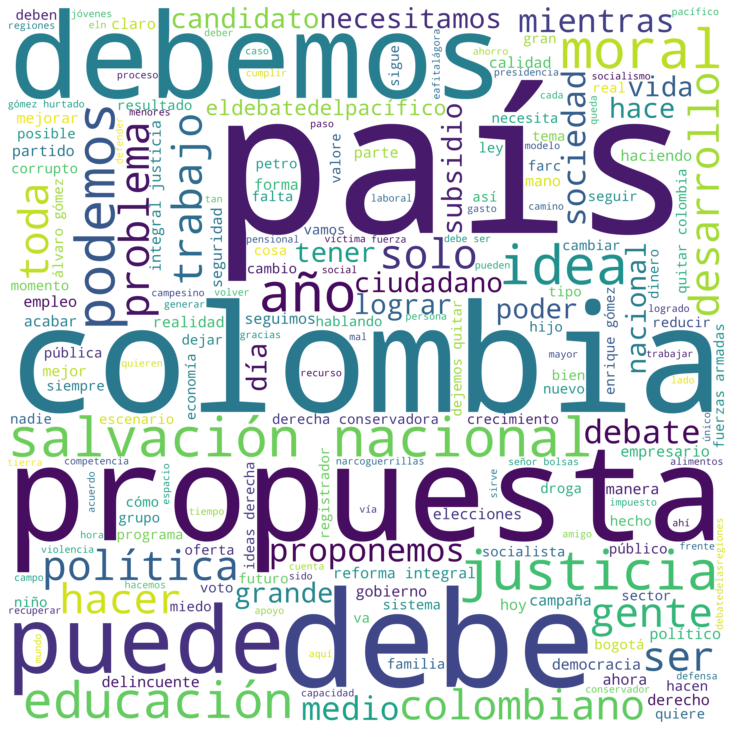

In [48]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Jhon Milton Rodriguez

In [49]:
JM = data('JohnMiltonR_', 1000)
JM.head(5)

candidato                     fecha  \
0  JohnMiltonR_ 2022-05-09 03:21:14+00:00   
1  JohnMiltonR_ 2022-05-09 03:20:47+00:00   
2  JohnMiltonR_ 2022-05-09 03:20:30+00:00   
3  JohnMiltonR_ 2022-05-09 03:09:51+00:00   
4  JohnMiltonR_ 2022-05-09 03:09:05+00:00   

                                                tuit  likes  rt fecha_ano  \
0  RT @berneos: @jDavidGutierrez @JohnMiltonR_ ht...      0   8      2022   
1  RT @SolmaSaumeth: @lasillavacia El que defiend...      0   3      2022   
2  RT @nina2408: @lasillavacia Eso no es cierto. ...      0   2      2022   
3  RT @darytob: Si si si. El es mi candidato. Sus...      0   5      2022   
4  RT @MagdNoticias: John Milton Rodríguez, candi...      0   4      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         9   9/May  9/May/2022  
3       May         9   9/May  9/May/2022  
4       May         9   9/May  9/May/2022

In [50]:
data_JM = ' '.join(item for item in JM.tuit)
data_JM

'RT @berneos: @jDavidGutierrez @JohnMiltonR_ https://t.co/h4AmHbnMDn RT @SolmaSaumeth: @lasillavacia El que defiende la vida desde la concepción se llama John Milton Rodriguez, desde antes de la campaña presi… RT @nina2408: @lasillavacia Eso no es cierto. No pueden generalizar! logró el apoyo de un sector que debe favores políticos a los partidos… RT @darytob: Si si si. El es mi candidato. Sus posiciones son claras a favor de la vida. @JohnMiltonR_  Presidente Va. https://t.co/w7tmhTJ… RT @MagdNoticias: John Milton Rodríguez, candidato presidencial, les desea 🌹felicidades a todas la madres que con su amor incondicional nos… RT @ndresF2: @NoticiasCaracol Porque no invitan a @JohnMiltonR_ RT @Danielsmith945: @NoticiasCaracol Faltan 2 candidatos @Enrique_GomezM  y @JohnMiltonR_  que pasa con caracol solo a quienes le convienen RT @DronevisionCo: Ese debate del cambio climático de @NoticiasCaracol  #Colombiadecide2022 sin @Enrique_GomezM y sin @JohnMiltonR_ es puro… RT @MagdNoticias: John 

In [51]:
words = word_tokenize(clean_text(data_JM)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['defiende', 'vida', 'concepción', 'llama', 'john', 'milton', 'rodriguez', 'campaña', 'cierto', 'pueden', 'generalizar', 'logró', 'apoyo', 'sector', 'debe', 'favores', 'políticos', 'si', 'si', 'si', 'candidato', 'posiciones', 'claras', 'favor', 'vida', 'presidente', 'john', 'milton', 'rodríguez', 'candidato', 'presidencial', 'desea', 'todas', 'madres', 'amor', 'incondicional', 'invitan', 'faltan', 'candidatos', 'pasa', 'caracol', 'solo', 'convienen', 'debate', 'cambio', 'climático', 'john', 'milton', 'rodríguez', 'fórmula', 'sandra', 'lajas', 'torres', 'consolidan', 'voto', 'cristiano', 'toman', 'regiones', 'único', 'candidato', 'defenderlas', 'madres', 'defender', 'vida', 'día', 'enaltecemos', 'hablo', 'aquellas', 'sufren', 'vamos', 'vida', 'transformar', 'colombia', 'cambiar', 'dolor', 'esperanza', 'johnmiltonpresidenteva', 'felizdiadelasmadres', 'diadelamadre', 'defiende', 'vida', 'concepción', 'llama', 'john', 'milton', 'rodriguez', 'campaña', 'florida', 'valle', 'hechos', 'marcan'

In [52]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

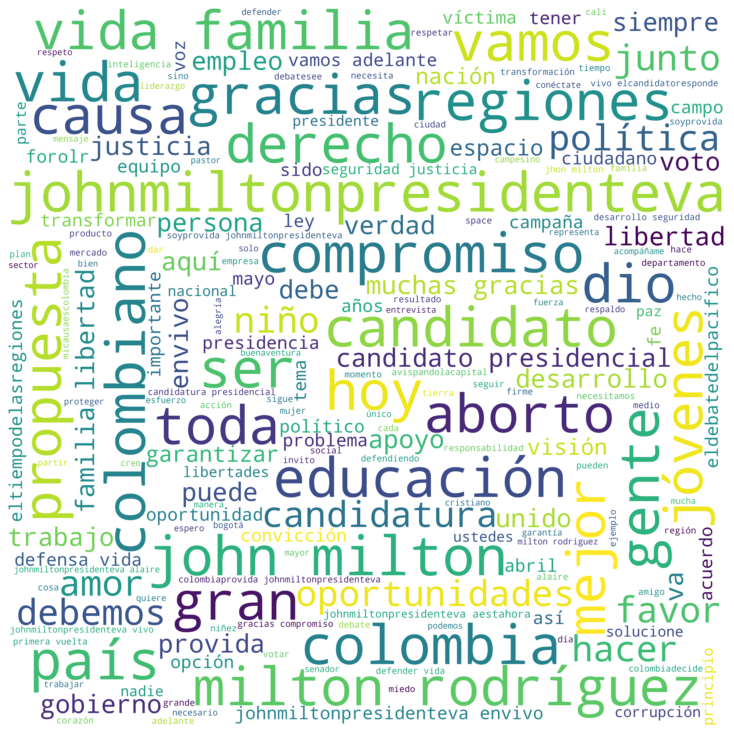

In [53]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Luis Perez

In [54]:
LUPE = data('Luis_Perez_G', 1000)
LUPE.head(5)

candidato                     fecha  \
0  Luis_Perez_G 2022-05-06 17:41:33+00:00   
1  Luis_Perez_G 2022-05-06 17:22:28+00:00   
2  Luis_Perez_G 2022-05-06 17:01:51+00:00   
3  Luis_Perez_G 2022-05-04 14:21:30+00:00   
4  Luis_Perez_G 2022-05-04 14:21:30+00:00   

                                                tuit  likes  rt fecha_ano  \
0  El gobierno frente al paro armado del Clan del...     20   4      2022   
1  El clan del golfo tiene en jaque a 9 departame...     33   9      2022   
2  El gobierno frente al paro armado del Clan del...      5   2      2022   
3  Las sociedades enfermas matan a sus mejores di...      9   2      2022   
4  Estremecedora la amenaza de muerte a @petrogus...     33   5      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         6   6/May  6/May/2022  
1       May         6   6/May  6/May/2022  
2       May         6   6/May  6/May/2022  
3       May         4   4/May  4/May/2022  
4       May         4   4/May  4/May/2022

In [55]:
data_LUPE = ' '.join(item for item in LUPE.tuit)
data_LUPE

'El gobierno frente al paro armado del Clan del golfo solo se queja y no aparece para proteger a los ciudadanos y agarrar a los bandidos. El que se queja sólo apoya la fábrica de pañuelos. #PiensaEnGrande El clan del golfo tiene en jaque a 9 departamentos. osea que una sola  banda criminal se mueve con libertad en el 25% del territorio y aterroriza sin intervención del gobierno a más de 20 millones de habitantes. #PiensaEnGrande El gobierno frente al paro armado del Clan del golfo solo se queja y no aparece para proteger a los ciudadanos y hecharle mano a los bandidos. El que se queja sólo apoya la fábrica de pañuelos. #PiensaEnGrande Las sociedades enfermas matan a sus mejores dirigentes;Colombia parece una colcha de retazos rojos con la sangre de grandes dirigentes. Primero la vida por encima de diferencias ideológicas. #PiensaEnGrande #LuisPérezPresidente Estremecedora la amenaza de muerte a @petrogustavo y a cualquier candidato a Presidencia. Colombia no puede seguir cargando la ve

In [56]:
words = word_tokenize(clean_text(data_LUPE)) 
stop_words = stopwords.words('spanish') # palabaras excluir por se rconectores prepocisiones u otros en español


words = [w.lower() for w in words] # conversion a minuscula para cruce con stop words


words = [w for w in words if not w in stop_words and w.isalpha()] # exclusion de cosas que no 
print(words)

['gobierno', 'frente', 'paro', 'armado', 'clan', 'golfo', 'solo', 'queja', 'aparece', 'proteger', 'ciudadanos', 'agarrar', 'bandidos', 'queja', 'sólo', 'apoya', 'fábrica', 'pañuelos', 'piensaengrande', 'clan', 'golfo', 'jaque', 'departamentos', 'osea', 'sola', 'banda', 'criminal', 'mueve', 'libertad', 'territorio', 'aterroriza', 'intervención', 'gobierno', 'millones', 'habitantes', 'piensaengrande', 'gobierno', 'frente', 'paro', 'armado', 'clan', 'golfo', 'solo', 'queja', 'aparece', 'proteger', 'ciudadanos', 'hecharle', 'mano', 'bandidos', 'queja', 'sólo', 'apoya', 'fábrica', 'pañuelos', 'piensaengrande', 'sociedades', 'enfermas', 'matan', 'mejores', 'dirigentes', 'colombia', 'parece', 'colcha', 'retazos', 'rojos', 'sangre', 'grandes', 'dirigentes', 'primero', 'vida', 'encima', 'diferencias', 'ideológicas', 'piensaengrande', 'luispérezpresidente', 'estremecedora', 'amenaza', 'muerte', 'cualquier', 'candidato', 'presidencia', 'colombia', 'puede', 'seguir', 'cargando', 'vergüenza', 'eter

In [57]:
no_words = ['RT', 'rt', 't', 'co', 'wy', 'https', 'tcw', 'x', 'zr', 'cnoubij', 'whzcjv', 'fc', 'pxr', 'tix', 'ma', 'mas', 'si']
words = [w for w in words if not w in no_words and w.isalpha()]

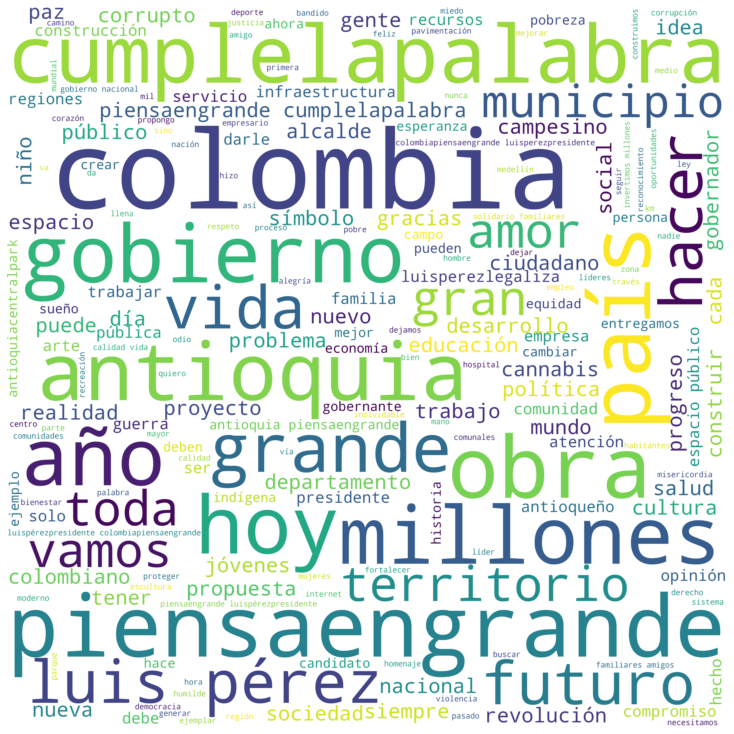

In [58]:
textoWC = ' '.join(words)

wordcloud = WordCloud(width = 5000, height = 5000, 
                background_color ='white', 
                stopwords = STOPWORDS,# max_words=200,
                relative_scaling =0,
                min_font_size = 10).generate(textoWC) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [62]:
df = pd.concat([GP, FG, RH, SF, IB, EG, JM, LUPE])
#df = df.drop(columns=['fecha','fecha_dia'])
df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 00:45:26+00:00   
1  petrogustavo 2022-05-09 00:44:50+00:00   
2  petrogustavo 2022-05-08 23:35:57+00:00   
3  petrogustavo 2022-05-08 23:08:30+00:00   
4  petrogustavo 2022-05-08 20:53:58+00:00   

                                                tuit  likes    rt fecha_ano  \
0  RT @petrogustavo: Un camino por la vida https:...      0  1662      2022   
1  RT @PatriciaUribe07: Esta noche en  @NoticiasU...      0   356      2022   
2      Un camino por la vida https://t.co/3iWYRbzUVH   4354  1662      2022   
3  RT @PetroValleC: #Caravana 🚗🚲🛵 así vivimos la ...      0   369      2022   
4  Duque le entregó el territorio al Clan del Gol...   6015  2232      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         8   8/May  8/May/2022  
3       May         8   8/May  8/May/2022  
4       May         8   8/May  8/May/2022

In [117]:
from classifier import *

In [63]:
from textblob import TextBlob

In [64]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [65]:
df['tuit'] = df['tuit'].apply(clean_text)
df.head()

candidato                     fecha  \
0  petrogustavo 2022-05-09 00:45:26+00:00   
1  petrogustavo 2022-05-09 00:44:50+00:00   
2  petrogustavo 2022-05-08 23:35:57+00:00   
3  petrogustavo 2022-05-08 23:08:30+00:00   
4  petrogustavo 2022-05-08 20:53:58+00:00   

                                                tuit  likes    rt fecha_ano  \
0            : Un camino por la vida t.co/3iWYRbzUVH      0  1662      2022   
1  7: Esta noche en    Obispo de Quibdó urge diál...      0   356      2022   
2              Un camino por la vida t.co/3iWYRbzUVH   4354  1662      2022   
3  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   369      2022   
4  Duque le entregó el territorio al Clan del Gol...   6015  2232      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  
0       May         9   9/May  9/May/2022  
1       May         9   9/May  9/May/2022  
2       May         8   8/May  8/May/2022  
3       May         8   8/May  8/May/2022  
4       May         8   8/May  8/May/2022

In [66]:
df['Subjetividad'] = df['tuit'].apply(get_subjectivity)
df['Polaridad'] = df['tuit'].apply(get_polarity)

df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 00:45:26+00:00   
1  petrogustavo 2022-05-09 00:44:50+00:00   
2  petrogustavo 2022-05-08 23:35:57+00:00   
3  petrogustavo 2022-05-08 23:08:30+00:00   
4  petrogustavo 2022-05-08 20:53:58+00:00   

                                                tuit  likes    rt fecha_ano  \
0            : Un camino por la vida t.co/3iWYRbzUVH      0  1662      2022   
1  7: Esta noche en    Obispo de Quibdó urge diál...      0   356      2022   
2              Un camino por la vida t.co/3iWYRbzUVH   4354  1662      2022   
3  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   369      2022   
4  Duque le entregó el territorio al Clan del Gol...   6015  2232      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  Subjetividad  Polaridad  
0       May         9   9/May  9/May/2022           0.0        0.0  
1       May         9   9/May  9/May/2022           0.0        0.0  
2       May         8   8/May  8/May/2022           0.0        0.0  
3       May         8   8/May  8/May/2022           0.0        0.0  
4       May         8   8/May  8/May/2022           0.0        0.0

In [67]:
def sentimiento(valor):
    if valor < 0:
        return 'Negativo'
    elif valor > 0:
        return 'Positivo'
    else:
        'Neutral'

df['Sentimiento'] = df['Polaridad'].apply(sentimiento)

df.head(5)

candidato                     fecha  \
0  petrogustavo 2022-05-09 00:45:26+00:00   
1  petrogustavo 2022-05-09 00:44:50+00:00   
2  petrogustavo 2022-05-08 23:35:57+00:00   
3  petrogustavo 2022-05-08 23:08:30+00:00   
4  petrogustavo 2022-05-08 20:53:58+00:00   

                                                tuit  likes    rt fecha_ano  \
0            : Un camino por la vida t.co/3iWYRbzUVH      0  1662      2022   
1  7: Esta noche en    Obispo de Quibdó urge diál...      0   356      2022   
2              Un camino por la vida t.co/3iWYRbzUVH   4354  1662      2022   
3  : Caravana 🚗🚲🛵 así vivimos la gran Petro Carav...      0   369      2022   
4  Duque le entregó el territorio al Clan del Gol...   6015  2232      2022   

  fecha_mes fecha_dia mes_dia       d_m_a  Subjetividad  Polaridad Sentimiento  
0       May         9   9/May  9/May/2022           0.0        0.0        None  
1       May         9   9/May  9/May/2022           0.0        0.0        None  
2       May         8   8/May  8/May/2022           0.0        0.0        None  
3       May         8   8/May  8/May/2022           0.0        0.0        None  
4       May         8   8/May  8/May/2022           0.0        0.0        None

In [68]:
df.to_csv('candidatos.csv', sep=',')

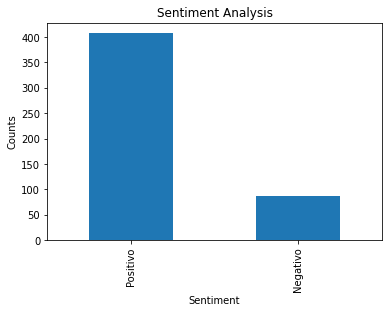

In [179]:
df['Sentimiento'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentimiento'].value_counts().plot(kind='bar')
plt.show()

In [71]:
import plotly.express as px
fig = px.bar(df.dropna(subset=['Sentimiento']), x='Sentimiento', facet_col='candidato', facet_col_wrap=2, height=1200, title='Tuits positivos y negativos por candidato', color='candidato', template='seaborn', text='Sentimiento', color_discrete_sequence=px.colors.qualitative.Antique[::-1])
fig.update_layout(legend_title_text='Candidato')
fig

In [72]:
fig = px.violin(df, x='candidato', y='Polaridad', color='candidato', height=800, title='Polaridad por candidato ', template='ggplot2')
fig

In [73]:
fig = px.scatter(df, x='Subjetividad', y='Polaridad', color='candidato', facet_row='candidato', height=1700, title='Subjetividad vs Polaridad de los tuits por Candidato', template='plotly_dark')
fig